# 데이터, 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

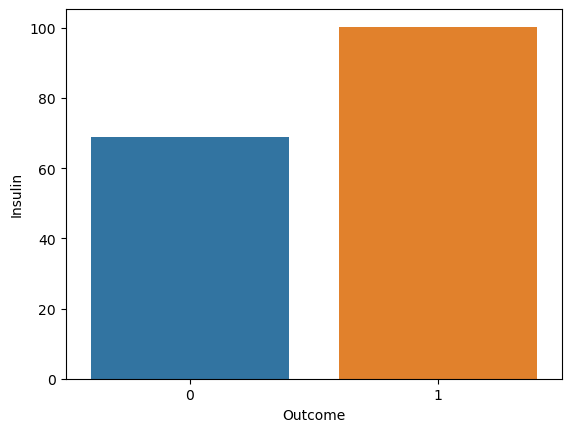

In [22]:
sns.barplot(data=df, x="Outcome", y="Insulin", errorbar=None)

# train, test set 

In [6]:
label_name = "Insulin"

In [7]:
train = df[df[label_name] > 0]
train.shape

(394, 9)

In [8]:
test = df[df[label_name] == 0]
test.shape

(374, 9)

# feature_names

In [12]:
feature_names = df.columns.tolist()
feature_names.remove(label_name)
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

# X_data, y_data set

In [17]:
X_train = train[feature_names]
X_train.shape

(394, 8)

In [18]:
y_train = train[label_name]
y_train.shape

(394,)

In [23]:
X_test = test[feature_names]
display(X_test.head(2))
X_test.shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0


(374, 8)

In [24]:
y_test = test[label_name]
display(y_test.head(2))
y_test.shape

0    0
1    0
Name: Insulin, dtype: int64

(374,)

# 머신러닝 알고리즘

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model

RandomForestRegressor(n_jobs=-1, random_state=42)

# 학습 

In [26]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

# cross vaildation 으로 오차 측정 

In [30]:
from sklearn.model_selection import cross_val_predict

# cv = fold의 수
# verbose : 로그를 찍을지 말지, 숫자가 높을수록 상세
y_predict = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_predict

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


array([ 42.89, 269.46,  74.45, 335.76, 274.58, 163.16, 190.74, 160.96,
       163.81, 181.83, 211.97, 148.85,  70.24, 234.72, 206.31,  40.02,
       136.01, 207.46, 256.72, 254.48, 105.78, 170.76,  61.23, 234.05,
       183.12, 325.11, 140.73, 123.33, 199.59,  57.17, 181.13, 112.39,
       180.68, 213.34,  68.16, 136.32, 104.81, 250.51, 133.96,  63.97,
       211.07, 182.59,  32.75,  97.68, 182.59,  63.27, 180.1 , 180.71,
        64.54, 116.42, 265.02, 210.18,  68.  , 244.81,  73.6 , 327.3 ,
       124.82,  79.9 , 144.62, 115.45, 142.83, 180.08, 279.05,  59.91,
       237.65,  98.56,  85.71, 122.17, 132.18, 233.6 , 126.15, 229.49,
       200.94, 285.81, 100.98, 142.88,  51.47, 275.63, 151.88, 150.93,
       127.3 , 121.88, 193.9 ,  69.8 ,  66.53, 245.84, 193.25, 124.3 ,
        59.54, 445.55, 180.3 , 138.38, 174.06, 156.37, 256.51, 148.02,
       159.4 , 234.07,  60.24, 170.6 , 272.61,  94.36, 266.2 , 135.98,
       196.5 , 164.32, 147.49, 243.26, 354.96, 107.79,  65.89, 288.12,
      

In [39]:
# 정답을 정확하게 맞춘 갯수
# 정답을 맞춘 것이 하나도 없음 = 정확도 0
# 정답과의 차이를 통해 얼마나 유사하게 맞췄는지 파악
(y_train == y_predict).mean()

0.0

# 실제값과 예측값의 차이 시각화

In [44]:
data = y_train - y_predict
data

3       51.11
4     -101.46
6       13.55
8      207.24
13     571.42
        ...  
753    227.42
755    -80.39
760    -48.42
763     36.49
765     -0.73
Name: Insulin, Length: 394, dtype: float64

<AxesSubplot:xlabel='Insulin'>

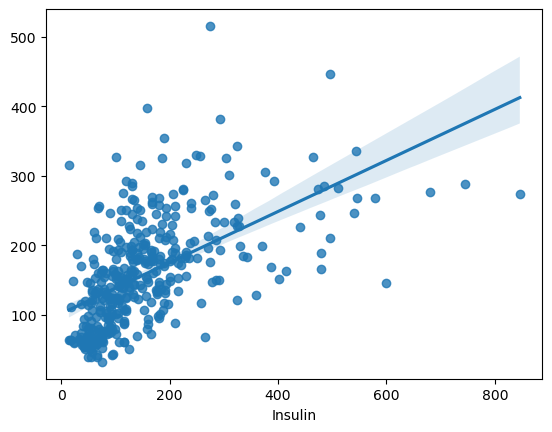

In [48]:
# regplot
sns.regplot(x=y_train, y=y_predict)

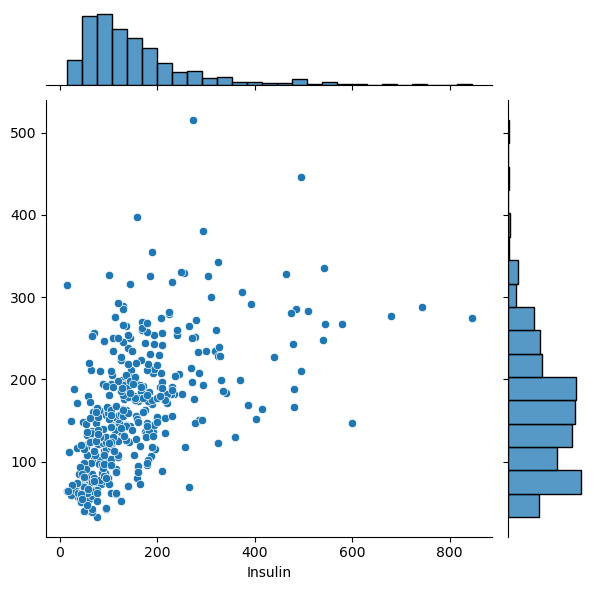

In [49]:
# jointplot
sns.jointplot(x=y_train, y=y_predict)

<AxesSubplot:xlabel='Insulin'>

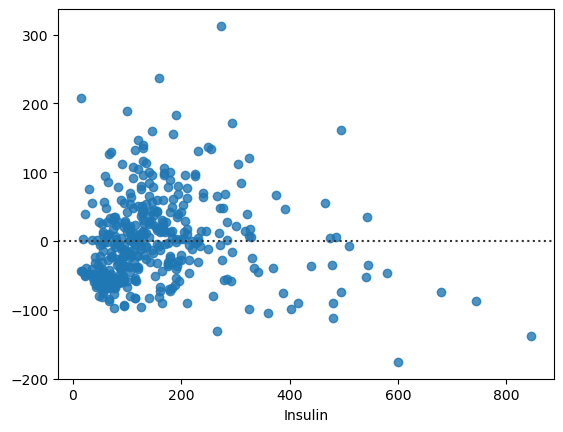

In [50]:
# residplot : 오차를 시각화, 0애 가까워야 좋은 것
sns.residplot(x=y_train, y=y_predict)

In [51]:
# r2_score : 정확도 점수화, 1에 가까울수록 정확한 예측
from sklearn.metrics import r2_score

r2_score(y_train, y_predict)

0.3116994764197346

In [52]:
# 정답과 예측값 df 생성
df_y = pd.DataFrame({"true": y_train, "predict": y_predict})
df_y.head()

,true,predict
3,94,42.89
4,168,269.46
6,88,74.45
8,543,335.76
13,846,274.58


<AxesSubplot:ylabel='Density'>

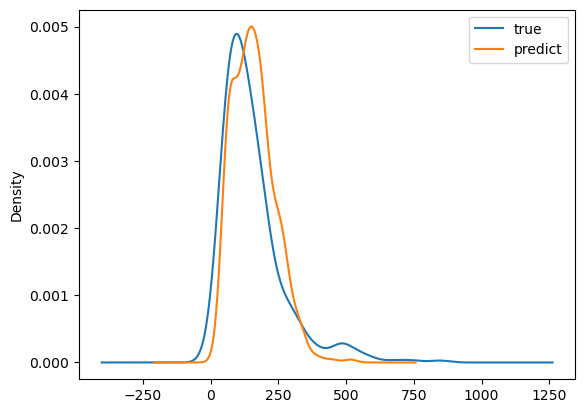

In [55]:
df_y.plot(kind="kde")

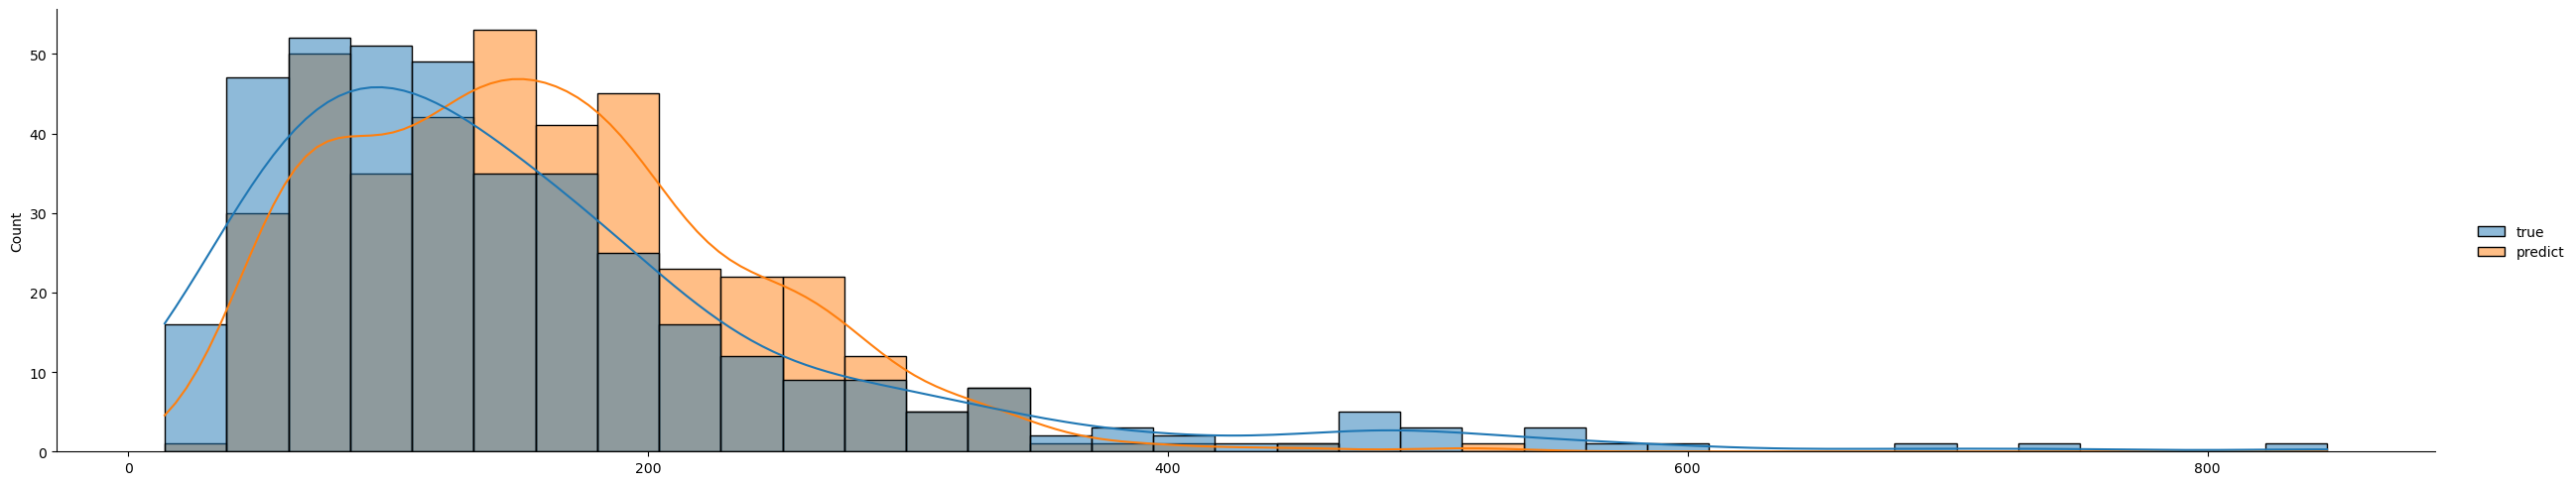

In [57]:
sns.displot(df_y, kde=True, aspect=5)

# 오차 구하기

In [59]:
error = abs(y_train - y_predict)
error

3       51.11
4      101.46
6       13.55
8      207.24
13     571.42
        ...  
753    227.42
755     80.39
760     48.42
763     36.49
765      0.73
Name: Insulin, Length: 394, dtype: float64

In [60]:
error.describe()

count    394.000000
mean      65.332944
std       73.695897
min        0.360000
25%       18.702500
50%       44.540000
75%       80.412500
max      571.420000
Name: Insulin, dtype: float64

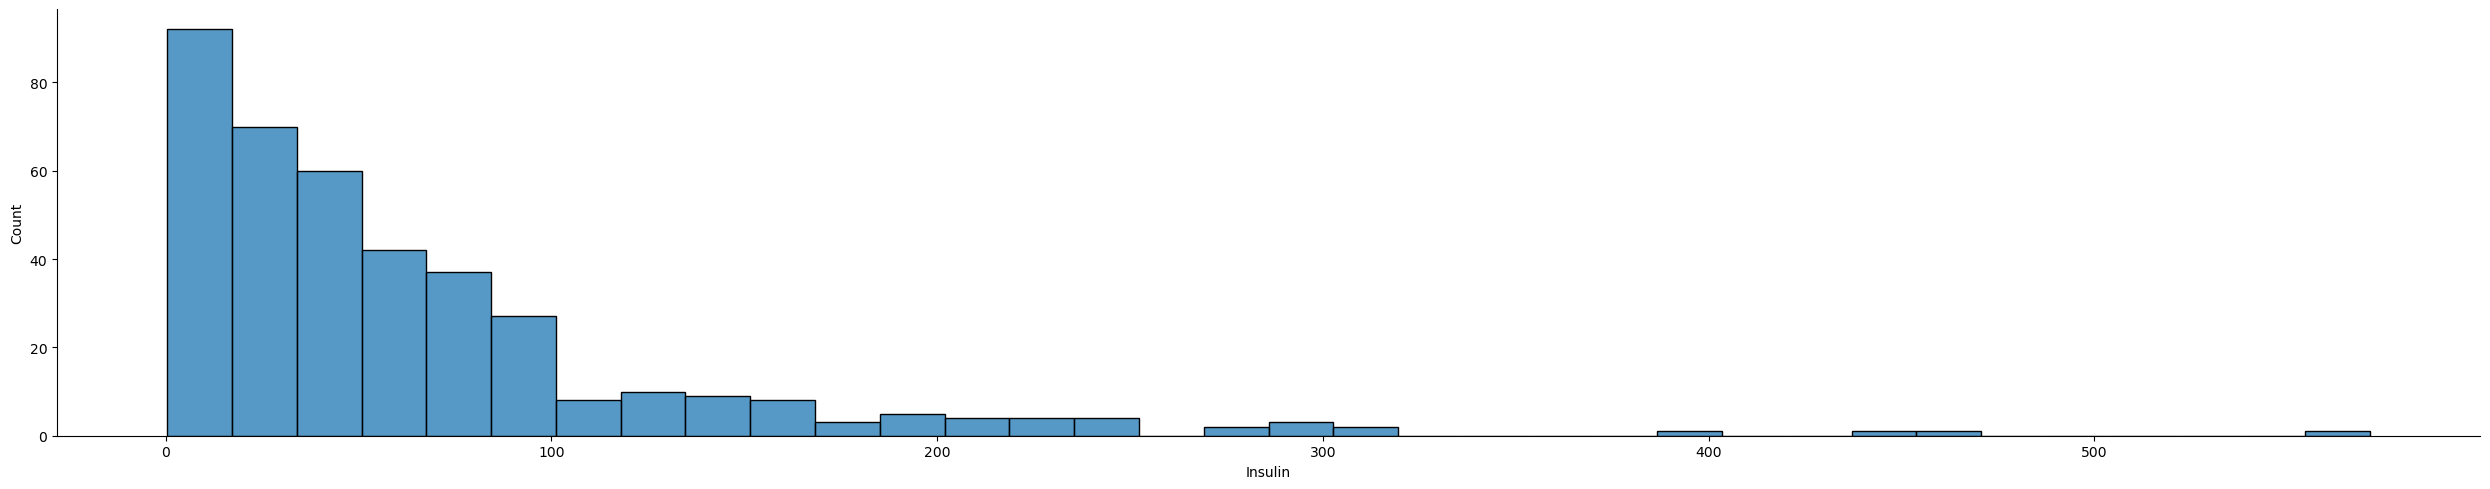

In [62]:
sns.displot(error, aspect=5)